<a href="https://colab.research.google.com/github/debi201326/AAI_Practical/blob/main/AAI_prac_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical No. 5: Implement Q-Learning algorithm to solve simple problem (Grid Navigation).

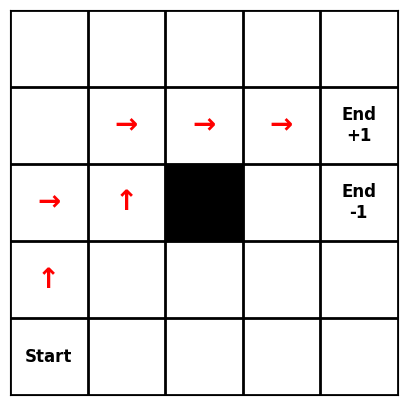

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size (5x5)
GRID_SIZE = 5
ACTIONS = ['left', 'right', 'up', 'down']
ACTION_DICT = {'left': 0, 'right': 1, 'up': 2, 'down': 3}
ACTION_SYMBOLS = {'left': '←', 'right': '→', 'up': '↑', 'down': '↓'}

# Rewards
REWARD_POSITIVE = 1  # +1 goal
REWARD_NEGATIVE = -1  # -1 goal
REWARD_OBSTACLE = -10  # Black obstacle
REWARD_MOVE = -0.1  # Small penalty per move

# Define positions (using matrix coordinates where (0,0) is top-left)
start_pos = (4, 0)  # Bottom-left (Start)
goal_positive = (1, 4)  # Top-right (End +1)
goal_negative = (2, 4)  # Below top-right (End -1)
obstacle = (2, 2)  # Center (Black Block)

# Initialize Q-table
Q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

# Q-Learning Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.3  # Exploration rate
episodes = 1000  # More training

# Function to move in the grid (now consistent with Matplotlib coordinates)
def get_next_position(state, action):
    x, y = state
    if action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, GRID_SIZE - 1)
    elif action == 'up':  # Up decreases x (toward top of plot)
        x = max(x - 1, 0)
    elif action == 'down':  # Down increases x (toward bottom of plot)
        x = min(x + 1, GRID_SIZE - 1)
    return (x, y)

# Q-Learning Algorithm
for episode in range(episodes):
    state = start_pos
    while state not in [goal_positive, goal_negative]:
        if np.random.rand() < epsilon:
            action = np.random.choice(ACTIONS)  # Explore
        else:
            action = ACTIONS[np.argmax(Q_table[state])]  # Exploit

        next_state = get_next_position(state, action)

        # Get rewards
        if next_state == goal_positive:
            reward = REWARD_POSITIVE
        elif next_state == goal_negative:
            reward = REWARD_NEGATIVE
        elif next_state == obstacle:
            reward = REWARD_OBSTACLE
        else:
            reward = REWARD_MOVE

        # Update Q-table
        Q_table[state][ACTION_DICT[action]] += alpha * (
            reward + gamma * np.max(Q_table[next_state]) - Q_table[state][ACTION_DICT[action]]
        )

        # Move to next state
        state = next_state

# Find best path
state = start_pos
path = [state]
arrows = {}

while state not in [goal_positive, goal_negative]:
    action_index = np.argmax(Q_table[state])  # Get best action index
    action = ACTIONS[action_index]  # Convert index to action
    next_state = get_next_position(state, action)  # Move to new state

    if next_state in path:  # Prevent infinite loops
        break

    # Store movement direction
    arrows[state] = ACTION_SYMBOLS[action]

    path.append(next_state)
    state = next_state

# Visualization
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xticks(np.arange(GRID_SIZE+1)-0.5, minor=True)
ax.set_yticks(np.arange(GRID_SIZE+1)-0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

# Plot elements with corrected coordinates
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        pos = (i, j)
        if pos == start_pos:
            ax.text(j, i, "Start", fontsize=12, ha='center', va='center', fontweight='bold')
        elif pos == goal_positive:
            ax.text(j, i, "End\n+1", fontsize=12, ha='center', va='center', fontweight='bold')
        elif pos == goal_negative:
            ax.text(j, i, "End\n-1", fontsize=12, ha='center', va='center', fontweight='bold')
        elif pos == obstacle:
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color='black'))
        elif pos in arrows:
            ax.text(j, i, arrows[pos], fontsize=20, ha='center', va='center', fontweight='bold', color='red')

ax.invert_yaxis()
plt.show()